Load data

In [1]:
import Data.data_provider as dp
import numpy as np

features, target = dp.load_data('fashionMnist')
features = np.reshape(features, (-1,28,28,1))
# features = features.transpose([0,2,3,1])

features.shape

(70000, 28, 28, 1)

Visualize images

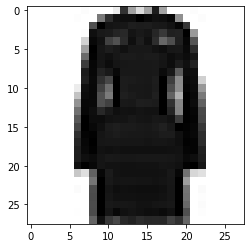

In [5]:
import matplotlib.pyplot as plt

plt.imshow(features[500], cmap=plt.cm.binary)

Train test calib split

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test_all, y_train, y_test_all = train_test_split(features, target, test_size=0.4, shuffle=True, random_state=1)
x_test, x_calib, y_test, y_calib = train_test_split(x_test_all, y_test_all, test_size=0.5, shuffle=True, random_state=1) 


2022-07-14 09:33:48.040048: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-14 09:33:48.040082: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Load pretrained network

In [4]:
import tensorflow as tf

print("loading model path: ", "Models/calibtest")
model = tf.keras.models.load_model("Models/NN_fashionMnist_run0_member0")
model.evaluate(x_test, y_test)

loading model path:  Models/calibtest


2022-07-14 09:33:51.174607: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-14 09:33:51.174648: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-14 09:33:51.174719: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mhshaker): /proc/driver/nvidia/version does not exist
2022-07-14 09:33:51.175078: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


438/438 [==============================] - 11s 23ms/step - loss: 0.1793 - accuracy: 0.9420


[0.17929065227508545, 0.9419999718666077]

Uncertainty Q

In [6]:
prob_x_test = model.predict(x_test)
prob_x_calib = model.predict(x_calib)

438/438 [==============================] - 11s 24ms/step


In [ ]:
from betacal import BetaCalibration

# Fit three-parameter beta calibration
bc = BetaCalibration(parameters="abm")
bc.fit(cal_probas.reshape(-1, 1), y_cal)